In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.naive_bayes import GaussianNB

Using TensorFlow backend.
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: Future

# Load Data

In [2]:
train=pd.read_csv("train_yaOffsB.csv")

In [3]:
test=pd.read_csv("test_pFkWwen.csv")

# Exploratory Data Analysis

In [4]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [6]:
train1=train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206C4B1A978>,
      dtype=object)

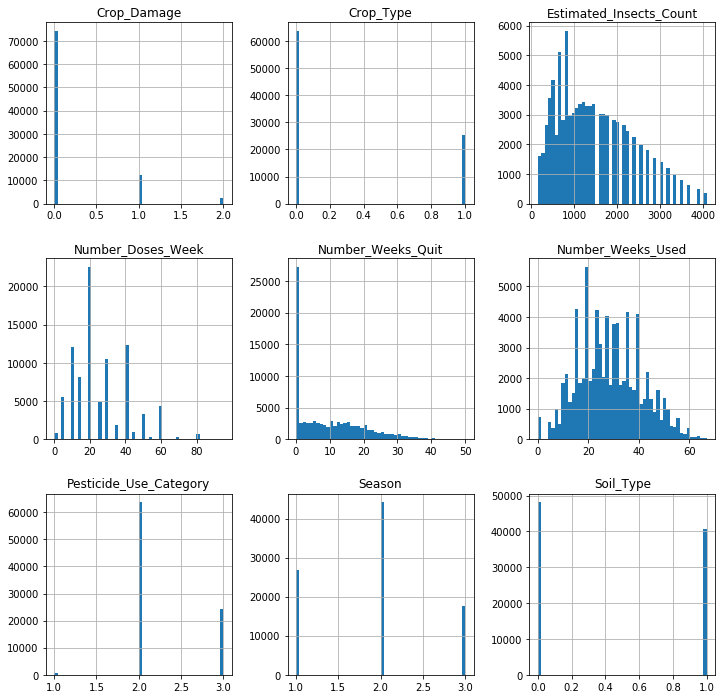

In [7]:
train1.hist(figsize=(12,12),bins=50)

(9.5, -0.5)

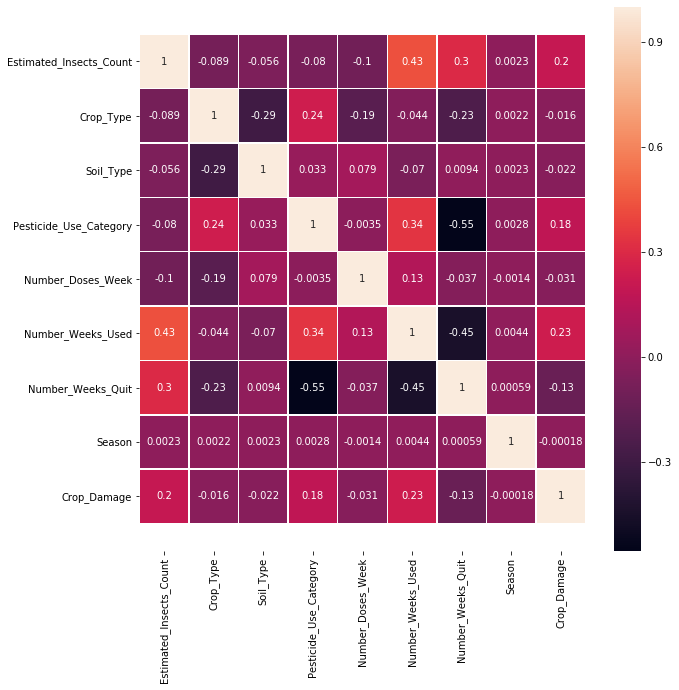

In [8]:
import sys
fig, ax = plt.subplots(figsize=(10,10))
ht=sns.heatmap(train1.corr(),annot=True,linewidths=0.5,ax=ax)
bottom,top=ht.get_ylim()
ht.set_ylim(bottom+0.5,top-0.5)

In [9]:
train1.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [10]:
train1['Number_Weeks_Used'].fillna(train1['Number_Weeks_Used'].mode()[0],inplace=True)

In [11]:
train1.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

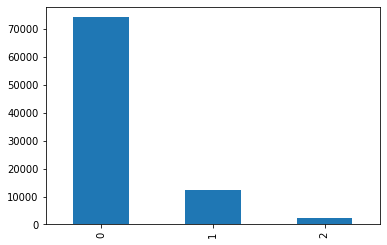

In [12]:
train1['Crop_Damage'].value_counts().plot.bar()

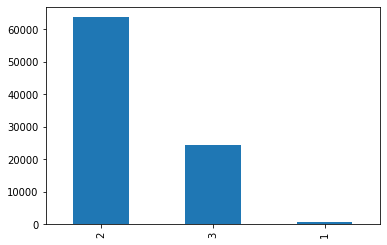

In [13]:
train1['Pesticide_Use_Category'].value_counts().plot.bar()

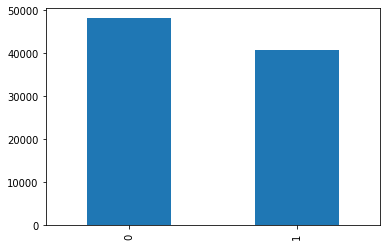

In [14]:
train1['Soil_Type'].value_counts().plot.bar()

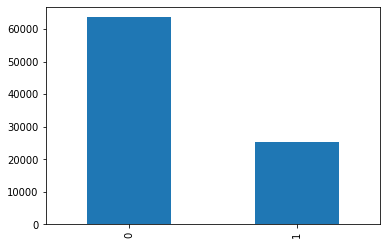

In [15]:
train1['Crop_Type'].value_counts().plot.bar()

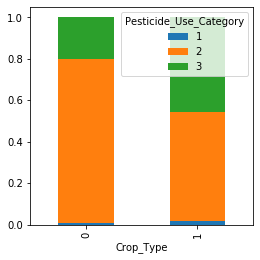

In [16]:
crop_type=pd.crosstab(train1['Crop_Type'],train1['Pesticide_Use_Category'])
crop_type.div(crop_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

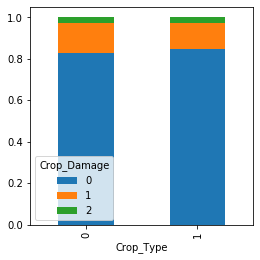

In [17]:
crop_type=pd.crosstab(train1['Crop_Type'],train1['Crop_Damage'])
crop_type.div(crop_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Both the categories are alive in huge amount at present while more crop of category 1 are alive since they are still using pesticides.

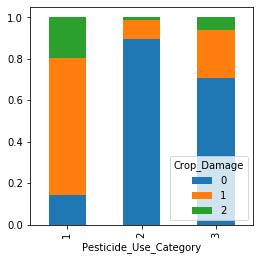

In [18]:
crop_type=pd.crosstab(train1['Pesticide_Use_Category'],train1['Crop_Damage'])
crop_type.div(crop_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

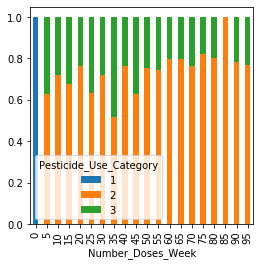

In [20]:
crop_type=pd.crosstab(train1['Number_Doses_Week'],train1['Pesticide_Use_Category'])
crop_type.div(crop_type.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

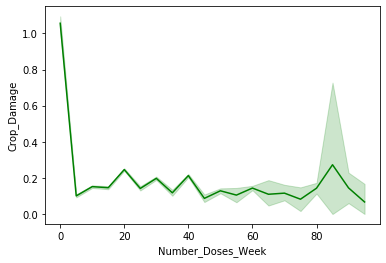

In [21]:
ax = sns.lineplot(x='Number_Doses_Week', y='Crop_Damage', data=train1, color="g")

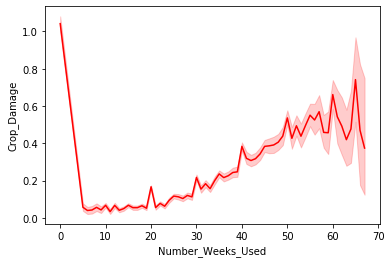

In [23]:
ax = sns.lineplot(x='Number_Weeks_Used', y='Crop_Damage', data=train1, color="r")

In [24]:
y=train1.Crop_Damage

In [25]:
X=train1.drop(['Crop_Damage','ID'],axis=1)

In [26]:
X=pd.get_dummies(X)

# Feature Selection

In [28]:
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 37220), (1, 53342), (2, 63419)]


In [29]:
x_train,x_cv,y_train,y_cv=train_test_split(X_resampled, y_resampled,test_size=0.25)

# Multinomial Naive Bayes

In [30]:
clf = MultinomialNB().fit(x_train, y_train)

In [31]:
clf_pred=clf.predict(x_cv)

In [32]:
Accuracy_MNB=accuracy_score(y_cv,clf_pred)


In [33]:
Accuracy_MNB

0.5348867414796342

# Multinomial Linear Regression

In [34]:
model=LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(x_train,y_train)
lr_pred=model.predict(x_cv)
Accuracy_LR=accuracy_score(y_cv,lr_pred)


# Random Forest

In [35]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'gini', random_state = 42)
classifier.fit(x_train, y_train)
classifier_pred=classifier.predict(x_cv)
Accuracy_RF=accuracy_score(y_cv,classifier_pred)

# Gaussian NB

In [36]:
classifier =GaussianNB()
classifier.fit(x_train, y_train)
classifier_pred=classifier.predict(x_cv)
Accuracy_GNB=accuracy_score(y_cv,classifier_pred)


# Comparison on model on Accuracy

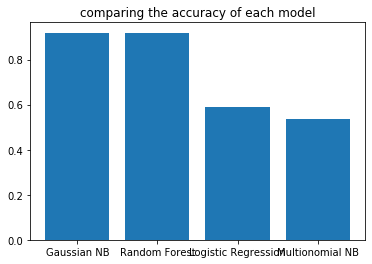

In [37]:
Accuracy = [Accuracy_RF, Accuracy_RF, Accuracy_LR,Accuracy_MNB]
Methods = ['Gaussian NB', 'Random Forest', 'Logistic Regression','Multionomial NB']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('comparing the accuracy of each model')
plt.show()

# Prediction on Test

In [38]:
test.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [39]:
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mode()[0],inplace=True)

In [40]:
ID=test.ID

In [42]:
test.drop(['ID'],axis=1,inplace=True)

In [43]:
test=pd.get_dummies(test)

In [44]:
classifier.fit(x_train,y_train)
pred_test=classifier.predict(test)

In [45]:
submission1=pd.DataFrame(index=ID)
submission1["Crop_Damage"]=pred_test

#Saving into csv
submission1.to_csv("Submission1.csv")